<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/07-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [17]:
# Paquetes necesarios
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
# Fijar las semillas para reproducibilidad
import random
import os
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

---
## <font color='264CC7'> Clasificación </font>

Se usará el conjunto de datos de dígitos de MNIST.

In [19]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [20]:
#Mostramos el conjunto de datos de mist que cargamos
display(X)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Mostramos el valor de y igual
display(y)

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


Como se observa, el valor de $x$ contiene todos los pixeles de la imagen a la que va referente al número en cuestión, y $y$ es el valor del número al que pertenece la imagen. Ahora veremos una descripción de los datos:

In [22]:
#Describimos los datos
display(X.describe())

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


En principio, se sabe que la escala del x va del 0 al 255 al contener esta llamada "escala de grises" que de ahí sale la forma en cómo un modelo podría aprender. Ahora vemos las imágenes con los datos de y para entender como funciona MINST:

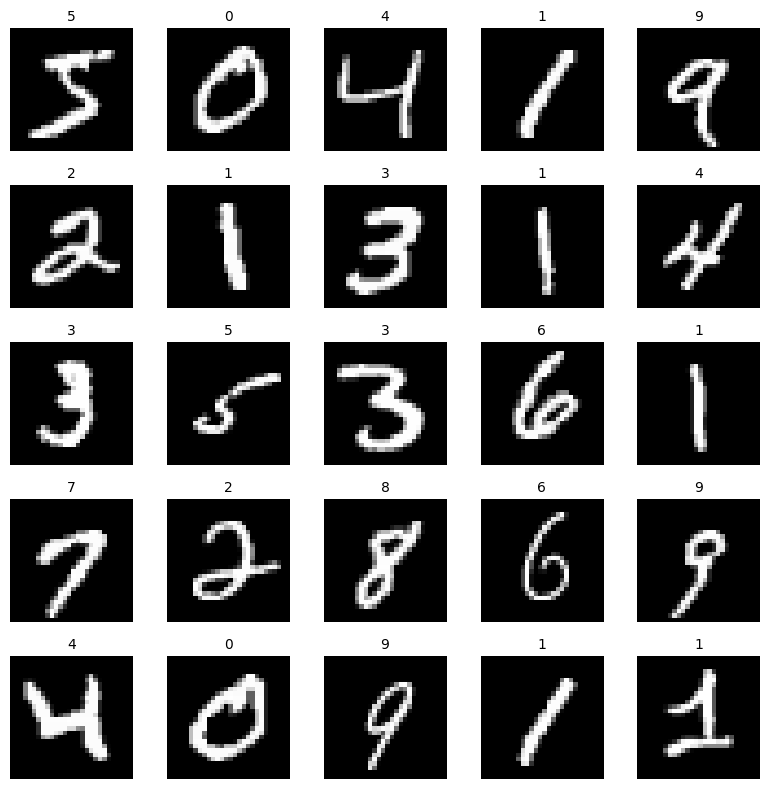

In [23]:
# Convertimos etiquetas a enteros (sigue siendo Series)
y_grafico = y.astype(int)

plt.figure(figsize=(8, 8))

for i in range(25):
    plt.subplot(5, 5, i + 1)

    # iloc → acceso por posición
    img = X.iloc[i].values.reshape(28, 28)

    plt.imshow(img, cmap="gray")
    plt.title(str(y_grafico.iloc[i]), fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

Dado que el x trabaja con números del 0 a 255, probablemente sea necesario el escalar los datos de tal manera que se ajuste al máximo de esta serie y el entrenamiento sea más rápido. Es decir, una normaliazción tipo max. No se hace min-max porque de la fórmula el mínimo es 0, y la diferencia con 0 hace que sea en realidad una normalización tipo max únicamente.

In [24]:
#Escalamos los datos por el máximo
X = X / 255


### <font color='264CC7'> Determinación de la red </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina una red neuronal para clasificar los datos:
<ul>
  <li>Define la red.</li>
  <li>Compila la red.</li>
  <li>Presenta un resumen de la red.</li>
</ul>
</div>


In [25]:
#Definimos la red para estos datos con 3 capas ocultas y una de salida de 10 neuronas
set_seed(11)
model = Sequential([
    Input(shape=(784,)),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'), #Usamos relu porque es menos suceptible al gradiente de desaparición en las 3 capas ocultas
    Dense(units=16, activation='relu'),
    Dense(units=10, activation='softmax') #Como softmas es ideal para categorías lo usamos como función de salida
])

# Compilamos el modelo
optimizer = SGD(learning_rate=0.1)
loss = CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,090 (101.91 KB)

 Trainable params: 26,090 (101.91 KB)

 Non-trainable params: 0 (0.00 B)

La red debería estar construída de tal forma que:
* Las capas ocultas puedan encontrar patrones
* La capa de salida sea de 10 neuronas para los 10 números existentes en este dataset (del 0 al 9)

Por tanto, yo poensé en usar una estructura de unas tres capas ocultas que permitan aprender patrones específicos a más generales y finalmente llegar a una capa de salida de 10 neuronas.

Para dividir las capas, se me ocurrió utilizar como referencia uno de los videos que nos mandó a revisar, que claro era ejemplo pero usaba dos capas de 16 neuronas. En mi caso para ver si mejora la precisión, ver si la primera capa oculta la hago de 32 para que encuentre más patrones específicos y los pueda relacionar mejor en algo más general a posterior. El link del video mencionado es este: https://www.youtube.com/watch?v=aircAruvnKk


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [26]:
#Primero, dividimos x y y en test y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [27]:
# Entrenar el modelo
y_cat = to_categorical(y_train, num_classes=10)
history = model.fit(X_train, y_cat, epochs=100, verbose=0)


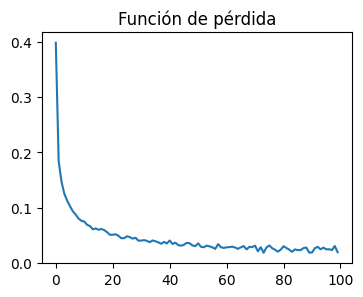

In [28]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Con una duración de entrenamiento de 6 minutos, vemos que la función de pérdida tuvo oscilamiento que puede tomarse como normal y al final parece ya no bajar a 0 sino parece estabilizarse. Si este fuera el caso, entonces el modelo no seria uno bueno al no seguir aprendiendo pero de todos modos se ve que está cerca del valor de 0 por lo que verificaremos sus métricas finales:

In [33]:
#Evaluamos el modelo entrenado
y_cat = to_categorical(y_test, num_classes=10)
test_loss = model.evaluate(X_test, y_cat, verbose=0)
print(f"Loss test: {test_loss:.4f}")
#Creamos la matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_int = y_test.astype(int) #Cambiamos a entero porque solo estaba en tipo string
cm = confusion_matrix(y_test_int, y_pred_classes)
print("Matriz de confusión:")
print(cm)

#Creamos el reporte de clasificacion
print("Reporte de clasificación:")
print(classification_report(y_test_int, y_pred_classes))

Loss test: 0.2823
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Matriz de confusión:
[[1401    0    4    0    1    3    4    2   10    0]
 [   0 1483    3    2    1    2    6    4    4    0]
 [  11    5 1333    7    0    1    6    6    7    3]
 [   2    5   13 1358    0   15    2    7   15    5]
 [   4    7   16    1 1269    0    7    2    2   37]
 [   6    0    1   19    1 1212    9    2   12   12]
 [   9    1    1    0    3   10 1373    0    4    1]
 [   3    4    8    4    3    2    0 1435    2   15]
 [   9   14   10    7    2    8   11    2 1295    5]
 [   9    1    2   13    8    5    1    9   15 1346]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1425
           1       0.98      0.99      0.98      1505
           2       0.96      0.97      0.96      1379
           3       0.96      0.95      0.96      1422
           4       0.99      0.94      0.96      1345
           5       0.96      0.95     

El Loss devolvión un valor de $0.2823$ lo que parece que si aprendió de los datos al ser un valor mayor (aunque no podría determinar que tan ligeramente mayor lo fue). La matriz de confusión parece ver que hay pocos valores en falsos y la zona donde hubo más fue en el 4 (probablemente porque hasta una persona normal podría confundirse de acuerdo a la imagen que hubiese sido) y la precisión en general es de $0.96$ lo que indica un buen modelo.